In [ ]:
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from datetime import datetime as dt
warnings.filterwarnings("ignore")

In [ ]:
pd.set_option('display.max_columns',500)
pd.set_option('display.width',1000)
pd.set_option('display.precision',4)
pd.set_option('display.expand_frame_repr',False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
print("Processos e Provisões a partir de 2004")
provisao_original = pd.read_csv(r"/content/drive/MyDrive/PUC MG/TCC/Fonte Dados/provisao_final.csv",sep=';',decimal='.',encoding='utf_8')

Processos e Provisões a partir de 2004


In [ ]:
provisao_original.shape

(151019, 36)

In [ ]:
provisao_original.index

RangeIndex(start=0, stop=151019, step=1)

In [ ]:
provisao_original.columns

Index(['ORIGEM_ACJ', 'CD_GP_ACO', 'DE_GRP_ACO', 'GR_ACO', 'CD_POS_BNB', 'DE_POS_PRC', 'DE_CAU_PED', 'cd_tp_prc', 'DE_TIP_PRC', 'CD_TP_ACO', 'NM_TP_ACO', 'PRC_ORI', 'ST_ATV_PRC', 'DT_CAD_PRC', 'cd_mod_ctr', 'DE_MOD_CTR', 'cd_cl_prc', 'de_cl_prc', 'ID_DMN_PRC', 'DE_DMN_PRC', 'ID_SEG', 'DE_SEG', 'ID_NAT_PRC', 'DE_NAT_PRC', 'AA_AJZ_PRC', 'VR_ACO', 'CD_FAS_PRC', 'NM_FAS_PRC', 'QTDE_MESES_PRC', 'QTDE_PEDIDO', 'VR_CTG_PRV', 'CD_CL', 'ProcessoDeRecDeCredito', 'EspecializacaoVara', 'processosAfins', 'ID_PRV'], dtype='object')

In [ ]:
provisao_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151019 entries, 0 to 151018
Data columns (total 36 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ORIGEM_ACJ              151019 non-null  int64  
 1   CD_GP_ACO               151019 non-null  int64  
 2   DE_GRP_ACO              151019 non-null  object 
 3   GR_ACO                  151019 non-null  object 
 4   CD_POS_BNB              151019 non-null  int64  
 5   DE_POS_PRC              151019 non-null  object 
 6   DE_CAU_PED              151019 non-null  object 
 7   cd_tp_prc               151019 non-null  int64  
 8   DE_TIP_PRC              151019 non-null  object 
 9   CD_TP_ACO               151019 non-null  int64  
 10  NM_TP_ACO               151019 non-null  object 
 11  PRC_ORI                 151019 non-null  int64  
 12  ST_ATV_PRC              151019 non-null  int64  
 13  DT_CAD_PRC              151019 non-null  object 
 14  cd_mod_ctr          

In [ ]:
provisao_original.head(10)

,ORIGEM_ACJ,CD_GP_ACO,DE_GRP_ACO,GR_ACO,CD_POS_BNB,DE_POS_PRC,DE_CAU_PED,cd_tp_prc,DE_TIP_PRC,CD_TP_ACO,NM_TP_ACO,PRC_ORI,ST_ATV_PRC,DT_CAD_PRC,cd_mod_ctr,DE_MOD_CTR,cd_cl_prc,de_cl_prc,ID_DMN_PRC,DE_DMN_PRC,ID_SEG,DE_SEG,ID_NAT_PRC,DE_NAT_PRC,AA_AJZ_PRC,VR_ACO,CD_FAS_PRC,NM_FAS_PRC,QTDE_MESES_PRC,QTDE_PEDIDO,VR_CTG_PRV,CD_CL,ProcessoDeRecDeCredito,EspecializacaoVara,processosAfins,ID_PRV
0,0,8,Cível - Vinculado à Operação,Recurso,4,Recorrente,SENTENCA DESFAVORAVEL,3,Judicial - Processo Eletrônico,56,RECURSO DE APELAÇÃO,1,1,09/08/2022,2,Licitação,1,Normal,P,Publico,1,Contencioso de Massa,11,Ato Processual,2008.0,500.00,196,ENCERRAMENTO - CADASTRO INDEVIDO DE CPJ ...,0,0,NaN,Z_DESCONSIDERAR,NAO,OUTROS,0,0
1,0,7,Cível Não Vinc. à Operação,Primario,3,Terceiro,INADIMPLENCIA DO DEVEDOR,3,Judicial - Processo Eletrônico,43,INVENTÁRIO,0,1,03/08/2022,4,Advogado Funcionário,1,Normal,P,Publico,4,Regular,10,Judicial Diverso,2003.0,2000.00,96,ENCERRAMENTO - EXITO ...,0,0,NaN,ÊXITO,NAO,OUTROS,0,0
2,0,8,Cível - Vinculado à Operação,Primario,2,Promovido,AUSENCIA DE CITACAO; ILEGALIDADE - ATO JURIDIC...,3,Judicial - Processo Eletrônico,149,EXCEÇÃO PRÉ-EXECUTIVIDADE,0,1,28/07/2022,4,Advogado Funcionário,1,Normal,P,Publico,1,Contencioso de Massa,11,Ato Processual,2021.0,1000.00,95,ENCERRAMENTO - SEM RESOLUÇÃO DO MERITO ...,1,0,NaN,ÊXITO,NAO,CIVEL,1,0
3,0,8,Cível - Vinculado à Operação,Primario,2,Promovido,SENTENCA FAVORAVEL,3,Judicial - Processo Eletrônico,226,CUMPRIMENTO DE SENTENCA,0,1,22/07/2022,2,Licitação,1,Normal,P,Publico,1,Contencioso de Massa,1,Cobrança Judicial,2022.0,7577.42,196,ENCERRAMENTO - CADASTRO INDEVIDO DE CPJ ...,1,0,NaN,Z_DESCONSIDERAR,NAO,CIVEL,1,0
4,0,8,Cível - Vinculado à Operação,Primario,1,Promovente,LITIGANTE RESIDENTE EM OUTRA COMARCA,3,Judicial - Processo Eletrônico,13,CARTA PRECATÓRIA,0,1,21/07/2022,4,Advogado Funcionário,1,Normal,P,Publico,1,Contencioso de Massa,11,Ato Processual,2022.0,1923.89,196,ENCERRAMENTO - CADASTRO INDEVIDO DE CPJ ...,1,0,NaN,Z_DESCONSIDERAR,NAO,CIVEL,0,0
5,0,8,Cível - Vinculado à Operação,Recurso,3,Terceiro,ILEGALIDADE - ATO JURIDICO,3,Judicial - Processo Eletrônico,167,AGRAVO,1,1,18/07/2022,4,Advogado Funcionário,1,Normal,P,Publico,4,Regular,11,Ato Processual,2015.0,218145.00,95,ENCERRAMENTO - SEM RESOLUÇÃO DO MERITO ...,1,0,NaN,ÊXITO,NAO,CAMARA DE DIREITO PRIVADO,0,0
6,0,8,Cível - Vinculado à Operação,Primario,2,Promovido,INADIMPLENCIA DO DEVEDOR,3,Judicial - Processo Eletrônico,27,EMBARGOS A EXECUÇÃO,0,1,15/07/2022,4,Advogado Funcionário,1,Normal,P,Publico,1,Contencioso de Massa,1,Cobrança Judicial,2013.0,1000.00,95,ENCERRAMENTO - SEM RESOLUÇÃO DO MERITO ...,1,0,NaN,ÊXITO,NAO,OUTROS,1,0
7,0,8,Cível - Vinculado à Operação,Primario,2,Promovido,EXCESSO DE EXECUCAO,3,Judicial - Processo Eletrônico,27,EMBARGOS A EXECUÇÃO,0,1,15/07/2022,4,Advogado Funcionário,1,Normal,P,Publico,4,Regular,1,Cobrança Judicial,2020.0,55086.04,196,ENCERRAMENTO - CADASTRO INDEVIDO DE CPJ ...,1,0,NaN,Z_DESCONSIDERAR,NAO,CIVEL,1,0
8,0,8,Cível - Vinculado à Operação,Recurso,5,Recorrido,SENTENCA FAVORAVEL,2,Judicial,56,RECURSO DE APELAÇÃO,1,1,14/07/2022,4,Advogado Funcionário,1,Normal,P,Publico,4,Regular,1,Cobrança Judicial,2017.0,352738.45,96,ENCERRAMENTO - EXITO ...,1,0,NaN,ÊXITO,NAO,CIVEL,0,0
9,0,10,Penal,Primario,1,Promovente,INVESTIGACAO CRIMINAL,3,Judicial - Processo Eletrônico,154,NOTÍCIA-CRIME,0,1,13/07/2022,4,Advogado Funcionário,1,Normal,P,Publico,1,Contencioso de Massa,10,Judicial Diverso,NaN,1.00,95,ENCERRAMENTO - SEM RESOLUÇÃO DO MERITO ...,1,0,NaN,SUCUMBÊNCIA,NAO,OUTROS,0,0


In [ ]:
provisao_original.tail(10)

,ORIGEM_ACJ,CD_GP_ACO,DE_GRP_ACO,GR_ACO,CD_POS_BNB,DE_POS_PRC,DE_CAU_PED,cd_tp_prc,DE_TIP_PRC,CD_TP_ACO,NM_TP_ACO,PRC_ORI,ST_ATV_PRC,DT_CAD_PRC,cd_mod_ctr,DE_MOD_CTR,cd_cl_prc,de_cl_prc,ID_DMN_PRC,DE_DMN_PRC,ID_SEG,DE_SEG,ID_NAT_PRC,DE_NAT_PRC,AA_AJZ_PRC,VR_ACO,CD_FAS_PRC,NM_FAS_PRC,QTDE_MESES_PRC,QTDE_PEDIDO,VR_CTG_PRV,CD_CL,ProcessoDeRecDeCredito,EspecializacaoVara,processosAfins,ID_PRV
151009,0,8,Cível - Vinculado à Operação,Primario,1,Promovente,LITIGANTE RESIDENTE EM OUTRA COMARCA,2,Judicial,13,CARTA PRECATÓRIA,0,1,31/03/2004,4,Advogado Funcionário,5,Preferencial-Prioritário,P,Publico,3,Prioritário,11,Ato Processual,NaN,1.0000e+02,96,ENCERRAMENTO - EXITO ...,221,0,NaN,ÊXITO,NAO,CIVEL,1,0
151010,1,8,Cível - Vinculado à Operação,Primario,1,Promovente,INADIMPLENCIA DO DEVEDOR,2,Judicial,109,MONITÓRIA,0,1,31/03/2004,2,Licitação,1,Normal,P,Publico,4,Regular,1,Cobrança Judicial,NaN,1.0948e+05,96,ENCERRAMENTO - EXITO ...,221,0,NaN,ÊXITO,SIM,CIVEL,0,0
151011,1,1,Vinculado a operações,Primario,1,Promovente,NAO INFORMADO,2,Judicial,109,MONITÓRIA,0,1,31/03/2004,2,Licitação,1,Normal,P,Publico,3,Prioritário,1,Cobrança Judicial,NaN,5.9904e+06,99,ENCERRAMENTO ...,221,0,NaN,Z_Não dá para definir,SIM,CIVEL,1,0
151012,0,8,Cível - Vinculado à Operação,Primario,1,Promovente,NAO INFORMADO,2,Judicial,13,CARTA PRECATÓRIA,0,1,31/03/2004,4,Advogado Funcionário,1,Normal,P,Publico,1,Contencioso de Massa,11,Ato Processual,NaN,1.0000e+00,122,ENCERRAMENTO - SEM CUMPRIMENTO ...,221,0,NaN,SUCUMBÊNCIA,NAO,CIVEL,1,0
151013,0,7,Cível Não Vinc. à Operação,Primario,1,Promovente,NAO INFORMADO,2,Judicial,13,CARTA PRECATÓRIA,0,1,31/03/2004,4,Advogado Funcionário,1,Normal,P,Publico,1,Contencioso de Massa,11,Ato Processual,NaN,1.0000e+00,121,ENCERRAMENTO - COM CUMPRIMENTO ...,221,0,NaN,ÊXITO,NAO,CIVEL,1,0
151014,0,4,Outros,Primario,2,Promovido,NAO INFORMADO,2,Judicial,47,ORDINÁRIA,0,1,31/03/2004,4,Advogado Funcionário,1,Normal,P,Publico,1,Contencioso de Massa,10,Judicial Diverso,NaN,2.4000e+02,95,ENCERRAMENTO - SEM RESOLUÇÃO DO MERITO ...,221,0,NaN,ÊXITO,NAO,CIVEL,0,0
151015,1,8,Cível - Vinculado à Operação,Primario,1,Promovente,NAO INFORMADO,2,Judicial,34,EXECUÇÃO,0,1,31/03/2004,2,Licitação,1,Normal,P,Publico,1,Contencioso de Massa,1,Cobrança Judicial,NaN,2.4265e+05,97,ENCERRAMENTO - ACORDO ...,221,0,NaN,ÊXITO / SUCUMBÊNCIA PARCIAL,SIM,CIVEL,1,0
151016,1,8,Cível - Vinculado à Operação,Primario,1,Promovente,INADIMPLENCIA DO DEVEDOR,2,Judicial,34,EXECUÇÃO,0,1,31/03/2004,4,Advogado Funcionário,1,Normal,P,Publico,1,Contencioso de Massa,1,Cobrança Judicial,NaN,9.1466e+03,97,ENCERRAMENTO - ACORDO ...,221,0,NaN,ÊXITO / SUCUMBÊNCIA PARCIAL,SIM,OUTROS,0,0
151017,0,2,Trabalhista,Recurso,4,Recorrente,NEGATIVA DE SEGUIMENTO A RECURSO; VIOLACAO A C...,2,Judicial,53,RECURSO AGRAVO DE INSTRUMENTO,1,1,31/03/2004,4,Advogado Funcionário,1,Normal,P,Publico,2,Estratégico,11,Ato Processual,NaN,1.5000e+04,97,ENCERRAMENTO - ACORDO ...,221,0,NaN,ÊXITO / SUCUMBÊNCIA PARCIAL,NAO,OUTROS,0,0
151018,0,7,Cível Não Vinc. à Operação,Primario,2,Promovido,NAO EXIBICAO DE DOCUMENTOS,1,Administrativo,122,INQUÉRITO CIVIL PUBLICO,0,1,20/06/2011,4,Advogado Funcionário,1,Normal,P,Publico,2,Estratégico,9,Administrativo Diverso,NaN,1.0000e+00,95,ENCERRAMENTO - SEM RESOLUÇÃO DO MERITO ...,134,0,NaN,ÊXITO,NAO,OUTROS,0,0


In [ ]:
provisao_original.isnull().sum()

ORIGEM_ACJ                     0
CD_GP_ACO                      0
DE_GRP_ACO                     0
GR_ACO                         0
CD_POS_BNB                     0
DE_POS_PRC                     0
DE_CAU_PED                     0
cd_tp_prc                      0
DE_TIP_PRC                     0
CD_TP_ACO                      0
NM_TP_ACO                      0
PRC_ORI                        0
ST_ATV_PRC                     0
DT_CAD_PRC                     0
cd_mod_ctr                     0
DE_MOD_CTR                     0
cd_cl_prc                      0
de_cl_prc                      0
ID_DMN_PRC                     0
DE_DMN_PRC                     0
ID_SEG                         0
DE_SEG                         0
ID_NAT_PRC                     0
DE_NAT_PRC                     0
AA_AJZ_PRC                129940
VR_ACO                         0
CD_FAS_PRC                     0
NM_FAS_PRC                     0
QTDE_MESES_PRC                 0
QTDE_PEDIDO                    0
VR_CTG_PRV

In [ ]:
colunas = ['ORIGEM_ACJ', 'DE_GRP_ACO', 'GR_ACO', 'DE_POS_PRC', 'DE_TIP_PRC', 'PRC_ORI', 
        'DE_MOD_CTR', 'de_cl_prc', 'DE_DMN_PRC', 'DE_SEG', 'DE_NAT_PRC', 'QTDE_MESES_PRC', 'QTDE_PEDIDO', 'ProcessoDeRecDeCredito','EspecializacaoVara','processosAfins','ID_PRV']

provisao = provisao_original[colunas]
provisao.head()


,ORIGEM_ACJ,DE_GRP_ACO,GR_ACO,DE_POS_PRC,DE_TIP_PRC,PRC_ORI,DE_MOD_CTR,de_cl_prc,DE_DMN_PRC,DE_SEG,DE_NAT_PRC,QTDE_MESES_PRC,QTDE_PEDIDO,ProcessoDeRecDeCredito,EspecializacaoVara,processosAfins,ID_PRV
0,0,Cível - Vinculado à Operação,Recurso,Recorrente,Judicial - Processo Eletrônico,1,Licitação,Normal,Publico,Contencioso de Massa,Ato Processual,0,0,NAO,OUTROS,0,0
1,0,Cível Não Vinc. à Operação,Primario,Terceiro,Judicial - Processo Eletrônico,0,Advogado Funcionário,Normal,Publico,Regular,Judicial Diverso,0,0,NAO,OUTROS,0,0
2,0,Cível - Vinculado à Operação,Primario,Promovido,Judicial - Processo Eletrônico,0,Advogado Funcionário,Normal,Publico,Contencioso de Massa,Ato Processual,1,0,NAO,CIVEL,1,0
3,0,Cível - Vinculado à Operação,Primario,Promovido,Judicial - Processo Eletrônico,0,Licitação,Normal,Publico,Contencioso de Massa,Cobrança Judicial,1,0,NAO,CIVEL,1,0
4,0,Cível - Vinculado à Operação,Primario,Promovente,Judicial - Processo Eletrônico,0,Advogado Funcionário,Normal,Publico,Contencioso de Massa,Ato Processual,1,0,NAO,CIVEL,0,0


In [ ]:
#Pedidos que não possuem pedidos são considerados como se tivessem pelo menos 1 pedido. Ou seja, são tratados pelo processo como um todo.
provisao['QTDE_PEDIDO'].replace(0,1, inplace=True)
provisao['QTDE_MESES_PRC'].replace(0,1, inplace=True)
provisao['ProcessoDeRecDeCredito'].replace('NAO',0, inplace=True)
provisao['ProcessoDeRecDeCredito'].replace('SIM',1, inplace=True)
provisao.head()

,ORIGEM_ACJ,DE_GRP_ACO,GR_ACO,DE_POS_PRC,DE_TIP_PRC,PRC_ORI,DE_MOD_CTR,de_cl_prc,DE_DMN_PRC,DE_SEG,DE_NAT_PRC,QTDE_MESES_PRC,QTDE_PEDIDO,ProcessoDeRecDeCredito,EspecializacaoVara,processosAfins,ID_PRV
0,0,Cível - Vinculado à Operação,Recurso,Recorrente,Judicial - Processo Eletrônico,1,Licitação,Normal,Publico,Contencioso de Massa,Ato Processual,1,1,0,OUTROS,0,0
1,0,Cível Não Vinc. à Operação,Primario,Terceiro,Judicial - Processo Eletrônico,0,Advogado Funcionário,Normal,Publico,Regular,Judicial Diverso,1,1,0,OUTROS,0,0
2,0,Cível - Vinculado à Operação,Primario,Promovido,Judicial - Processo Eletrônico,0,Advogado Funcionário,Normal,Publico,Contencioso de Massa,Ato Processual,1,1,0,CIVEL,1,0
3,0,Cível - Vinculado à Operação,Primario,Promovido,Judicial - Processo Eletrônico,0,Licitação,Normal,Publico,Contencioso de Massa,Cobrança Judicial,1,1,0,CIVEL,1,0
4,0,Cível - Vinculado à Operação,Primario,Promovente,Judicial - Processo Eletrônico,0,Advogado Funcionário,Normal,Publico,Contencioso de Massa,Ato Processual,1,1,0,CIVEL,0,0


In [ ]:
provisao.value_counts('QTDE_PEDIDO')

QTDE_PEDIDO
1     149751
2        709
3        208
4         68
7         57
6         49
8         46
9         41
5         40
10        24
11        11
12         6
14         4
17         2
13         1
15         1
20         1
dtype: int64

In [ ]:
provisao.value_counts('QTDE_MESES_PRC')

QTDE_MESES_PRC
140    3370
135    3143
134    2721
137    2562
141    2285
       ... 
7        67
3        50
2        41
221      29
1        21
Length: 221, dtype: int64

In [ ]:
provisao.value_counts('ProcessoDeRecDeCredito')

ProcessoDeRecDeCredito
0    77667
1    73352
dtype: int64

In [ ]:
provisao.shape

(151019, 17)

In [ ]:
provisao.columns

Index(['ORIGEM_ACJ', 'DE_GRP_ACO', 'GR_ACO', 'DE_POS_PRC', 'DE_TIP_PRC', 'PRC_ORI', 'DE_MOD_CTR', 'de_cl_prc', 'DE_DMN_PRC', 'DE_SEG', 'DE_NAT_PRC', 'QTDE_MESES_PRC', 'QTDE_PEDIDO', 'ProcessoDeRecDeCredito', 'EspecializacaoVara', 'processosAfins', 'ID_PRV'], dtype='object')

In [ ]:
provisao.isnull().sum()

ORIGEM_ACJ                0
DE_GRP_ACO                0
GR_ACO                    0
DE_POS_PRC                0
DE_TIP_PRC                0
PRC_ORI                   0
DE_MOD_CTR                0
de_cl_prc                 0
DE_DMN_PRC                0
DE_SEG                    0
DE_NAT_PRC                0
QTDE_MESES_PRC            0
QTDE_PEDIDO               0
ProcessoDeRecDeCredito    0
EspecializacaoVara        0
processosAfins            0
ID_PRV                    0
dtype: int64

In [ ]:
provisao.corr().round(4)

,ORIGEM_ACJ,PRC_ORI,QTDE_MESES_PRC,QTDE_PEDIDO,ProcessoDeRecDeCredito,processosAfins,ID_PRV
ORIGEM_ACJ,1.0000,-0.4685,0.0694,-0.0606,0.9673,-0.2611,-0.2406
PRC_ORI,-0.4685,1.0000,-0.1037,-0.0323,-0.4831,-0.2212,-0.1350
QTDE_MESES_PRC,0.0694,-0.1037,1.0000,-0.0048,0.0768,0.1277,-0.0513
QTDE_PEDIDO,-0.0606,-0.0323,-0.0048,1.0000,-0.0625,-0.0115,0.0812
ProcessoDeRecDeCredito,0.9673,-0.4831,0.0768,-0.0625,1.0000,-0.2579,-0.2487
processosAfins,-0.2611,-0.2212,0.1277,-0.0115,-0.2579,1.0000,-0.0823
ID_PRV,-0.2406,-0.1350,-0.0513,0.0812,-0.2487,-0.0823,1.0000


In [ ]:
provisao = provisao.drop(columns=['ProcessoDeRecDeCredito'])

In [ ]:
provisao.corr().round(4)

,ORIGEM_ACJ,PRC_ORI,QTDE_MESES_PRC,QTDE_PEDIDO,processosAfins,ID_PRV
ORIGEM_ACJ,1.0000,-0.4685,0.0694,-0.0606,-0.2611,-0.2406
PRC_ORI,-0.4685,1.0000,-0.1037,-0.0323,-0.2212,-0.1350
QTDE_MESES_PRC,0.0694,-0.1037,1.0000,-0.0048,0.1277,-0.0513
QTDE_PEDIDO,-0.0606,-0.0323,-0.0048,1.0000,-0.0115,0.0812
processosAfins,-0.2611,-0.2212,0.1277,-0.0115,1.0000,-0.0823
ID_PRV,-0.2406,-0.1350,-0.0513,0.0812,-0.0823,1.0000


In [ ]:
provisao.value_counts('ID_PRV',normalize=True).round(2)

ID_PRV
0    0.93
1    0.07
dtype: float64

In [ ]:
provisao.value_counts('ID_PRV')

ID_PRV
0    140405
1     10614
dtype: int64

In [ ]:
#Importação da função resample da biblioteca sklearn
from sklearn.utils import resample

provisao_minoria = provisao[provisao.ID_PRV==1]

provisao_maioria = provisao[provisao.ID_PRV==0]

provisao_minoria.info

provisao_minoria.value_counts('ID_PRV')

provisao_maioria.info

provisao_maioria.value_counts('ID_PRV')

provisao_minoria_resample = resample(provisao_minoria, replace=True, n_samples=140405, random_state=123)

provisao = pd.concat([provisao_maioria, provisao_minoria_resample])

provisao.value_counts('ID_PRV',normalize=True).round(2)

ID_PRV
0    0.5
1    0.5
dtype: float64

In [ ]:
provisao.reset_index(inplace=True, drop=True)

In [ ]:
provisao.head()

,ORIGEM_ACJ,DE_GRP_ACO,GR_ACO,DE_POS_PRC,DE_TIP_PRC,PRC_ORI,DE_MOD_CTR,de_cl_prc,DE_DMN_PRC,DE_SEG,DE_NAT_PRC,QTDE_MESES_PRC,QTDE_PEDIDO,EspecializacaoVara,processosAfins,ID_PRV
0,0,Cível - Vinculado à Operação,Recurso,Recorrente,Judicial - Processo Eletrônico,1,Licitação,Normal,Publico,Contencioso de Massa,Ato Processual,1,1,OUTROS,0,0
1,0,Cível Não Vinc. à Operação,Primario,Terceiro,Judicial - Processo Eletrônico,0,Advogado Funcionário,Normal,Publico,Regular,Judicial Diverso,1,1,OUTROS,0,0
2,0,Cível - Vinculado à Operação,Primario,Promovido,Judicial - Processo Eletrônico,0,Advogado Funcionário,Normal,Publico,Contencioso de Massa,Ato Processual,1,1,CIVEL,1,0
3,0,Cível - Vinculado à Operação,Primario,Promovido,Judicial - Processo Eletrônico,0,Licitação,Normal,Publico,Contencioso de Massa,Cobrança Judicial,1,1,CIVEL,1,0
4,0,Cível - Vinculado à Operação,Primario,Promovente,Judicial - Processo Eletrônico,0,Advogado Funcionário,Normal,Publico,Contencioso de Massa,Ato Processual,1,1,CIVEL,0,0


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

encoder = OneHotEncoder(handle_unknown='ignore')
encoder_columns = ['DE_GRP_ACO', 'GR_ACO', 'DE_POS_PRC', 'DE_TIP_PRC', 
                   'DE_MOD_CTR', 'de_cl_prc', 'DE_DMN_PRC', 'DE_SEG', 'DE_NAT_PRC', 'EspecializacaoVara']
encoder.fit(provisao[encoder_columns])

OneHotEncoder(handle_unknown='ignore')

In [ ]:
encoder.get_feature_names()

array(['x0_Administrativo', 'x0_Cível - Vinculado ao Finor',
       'x0_Cível - Vinculado à Operação', 'x0_Cível Não Vinc. à Operação',
       'x0_Fiscal', 'x0_Fiscal - Estadual', 'x0_Fiscal - Federal',
       'x0_Fiscal - Municipal', 'x0_Outros', 'x0_Penal', 'x0_Trabalhista',
       'x0_Tributário', 'x0_Vinculado a operações', 'x1_Primario',
       'x1_Recurso', 'x1_Secundario', 'x2_Promovente', 'x2_Promovido',
       'x2_Recorrente', 'x2_Recorrente-Recorrido', 'x2_Recorrido',
       'x2_Terceiro', 'x3_Administrativo', 'x3_Judicial',
       'x3_Judicial - Processo Eletrônico', 'x4_Advogado Funcionário',
       'x4_Credenciado', 'x4_Licitação', 'x5_Estratégico',
       'x5_Estratégico/Sigiloso', 'x5_Normal', 'x5_Preferencial',
       'x5_Preferencial-Prioritário', 'x6_Confidencial', 'x6_Publico',
       'x7_Contencioso de Massa', 'x7_Estratégico', 'x7_Prioritário',
       'x7_Regular', 'x8_Administrativo Diverso', 'x8_Ato Processual',
       'x8_Autos de Infração/Multa – SRTE', 'x8_Cob

In [ ]:
encoder.get_feature_names(encoder_columns)

array(['DE_GRP_ACO_Administrativo',
       'DE_GRP_ACO_Cível - Vinculado ao Finor',
       'DE_GRP_ACO_Cível - Vinculado à Operação',
       'DE_GRP_ACO_Cível Não Vinc. à Operação', 'DE_GRP_ACO_Fiscal',
       'DE_GRP_ACO_Fiscal - Estadual', 'DE_GRP_ACO_Fiscal - Federal',
       'DE_GRP_ACO_Fiscal - Municipal', 'DE_GRP_ACO_Outros',
       'DE_GRP_ACO_Penal', 'DE_GRP_ACO_Trabalhista',
       'DE_GRP_ACO_Tributário', 'DE_GRP_ACO_Vinculado a operações',
       'GR_ACO_Primario', 'GR_ACO_Recurso', 'GR_ACO_Secundario',
       'DE_POS_PRC_Promovente', 'DE_POS_PRC_Promovido',
       'DE_POS_PRC_Recorrente', 'DE_POS_PRC_Recorrente-Recorrido',
       'DE_POS_PRC_Recorrido', 'DE_POS_PRC_Terceiro',
       'DE_TIP_PRC_Administrativo', 'DE_TIP_PRC_Judicial',
       'DE_TIP_PRC_Judicial - Processo Eletrônico',
       'DE_MOD_CTR_Advogado Funcionário', 'DE_MOD_CTR_Credenciado',
       'DE_MOD_CTR_Licitação', 'de_cl_prc_Estratégico',
       'de_cl_prc_Estratégico/Sigiloso', 'de_cl_prc_Normal',
       

In [ ]:
provisao_enconded = pd.DataFrame(encoder.transform(provisao[encoder_columns]).toarray()).astype('int')
provisao_enconded.columns = encoder.get_feature_names(encoder_columns)

In [ ]:
provisao_enconded.sample(10)

,DE_GRP_ACO_Administrativo,DE_GRP_ACO_Cível - Vinculado ao Finor,DE_GRP_ACO_Cível - Vinculado à Operação,DE_GRP_ACO_Cível Não Vinc. à Operação,DE_GRP_ACO_Fiscal,DE_GRP_ACO_Fiscal - Estadual,DE_GRP_ACO_Fiscal - Federal,DE_GRP_ACO_Fiscal - Municipal,DE_GRP_ACO_Outros,DE_GRP_ACO_Penal,DE_GRP_ACO_Trabalhista,DE_GRP_ACO_Tributário,DE_GRP_ACO_Vinculado a operações,GR_ACO_Primario,GR_ACO_Recurso,GR_ACO_Secundario,DE_POS_PRC_Promovente,DE_POS_PRC_Promovido,DE_POS_PRC_Recorrente,DE_POS_PRC_Recorrente-Recorrido,DE_POS_PRC_Recorrido,DE_POS_PRC_Terceiro,DE_TIP_PRC_Administrativo,DE_TIP_PRC_Judicial,DE_TIP_PRC_Judicial - Processo Eletrônico,DE_MOD_CTR_Advogado Funcionário,DE_MOD_CTR_Credenciado,DE_MOD_CTR_Licitação,de_cl_prc_Estratégico,de_cl_prc_Estratégico/Sigiloso,de_cl_prc_Normal,de_cl_prc_Preferencial,de_cl_prc_Preferencial-Prioritário,DE_DMN_PRC_Confidencial,DE_DMN_PRC_Publico,DE_SEG_Contencioso de Massa,DE_SEG_Estratégico,DE_SEG_Prioritário,DE_SEG_Regular,DE_NAT_PRC_Administrativo Diverso,DE_NAT_PRC_Ato Processual,DE_NAT_PRC_Autos de Infração/Multa – SRTE,DE_NAT_PRC_Cobrança Judicial,DE_NAT_PRC_Indenizatória Cível,DE_NAT_PRC_Indenizatória Fiscal,DE_NAT_PRC_Indenizatória Trabalhista,DE_NAT_PRC_Judicial Diverso,DE_NAT_PRC_Modificação de Crédito/Garantia,DE_NAT_PRC_Outros Autos de Infração/Multas,DE_NAT_PRC_Preservação de Crédito,EspecializacaoVara_CAMARA DE DIREITO EMPRESARIAL,EspecializacaoVara_CAMARA DE DIREITO PRIVADO,EspecializacaoVara_CIVEL,EspecializacaoVara_CRIMINAL,EspecializacaoVara_DEFESA DO CONSUMIDOR,EspecializacaoVara_DELEGACIA REG. DO TRABALHO,EspecializacaoVara_EXEC. FISCAIS/CRIME ORDEM TRIB,EspecializacaoVara_EXECUÇÃO DE TÍTULOS EXTRAJUDIC,EspecializacaoVara_FALÊNCIA E CONCORDATA,EspecializacaoVara_FAZENDA PÚBLICA,EspecializacaoVara_JUIZADOS ESPECIAIS,EspecializacaoVara_JUSTIÇA FEDERAL,EspecializacaoVara_OUTROS,EspecializacaoVara_PLENO TRIBUNAL,EspecializacaoVara_PRECATORIA,EspecializacaoVara_RECUP. DE EMPRESAS E FALENCIAS,EspecializacaoVara_REGISTROS PUBLICOS,EspecializacaoVara_SUCESSÕES,EspecializacaoVara_TRABALHISTA,EspecializacaoVara_TURMA RECURSAL
162283,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
160902,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
22973,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
66076,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
230782,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
183826,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
249262,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
131770,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
51778,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
269302,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
discrete_columns = ['ORIGEM_ACJ', 'PRC_ORI','QTDE_MESES_PRC','QTDE_PEDIDO','processosAfins']
discreto = provisao[discrete_columns]

In [ ]:
discreto.dtypes

ORIGEM_ACJ        int64
PRC_ORI           int64
QTDE_MESES_PRC    int64
QTDE_PEDIDO       int64
processosAfins    int64
dtype: object

In [ ]:
discreto.head(5)

,ORIGEM_ACJ,PRC_ORI,QTDE_MESES_PRC,QTDE_PEDIDO,processosAfins
0,0,1,1,1,0
1,0,0,1,1,0
2,0,0,1,1,1
3,0,0,1,1,1
4,0,0,1,1,0


In [ ]:
provisao_final =  pd.concat([discreto, provisao_enconded], axis=1 )

In [ ]:
provisao_final.shape

(280810, 75)

In [ ]:
provisao_final.head(10)

,ORIGEM_ACJ,PRC_ORI,QTDE_MESES_PRC,QTDE_PEDIDO,processosAfins,DE_GRP_ACO_Administrativo,DE_GRP_ACO_Cível - Vinculado ao Finor,DE_GRP_ACO_Cível - Vinculado à Operação,DE_GRP_ACO_Cível Não Vinc. à Operação,DE_GRP_ACO_Fiscal,DE_GRP_ACO_Fiscal - Estadual,DE_GRP_ACO_Fiscal - Federal,DE_GRP_ACO_Fiscal - Municipal,DE_GRP_ACO_Outros,DE_GRP_ACO_Penal,DE_GRP_ACO_Trabalhista,DE_GRP_ACO_Tributário,DE_GRP_ACO_Vinculado a operações,GR_ACO_Primario,GR_ACO_Recurso,GR_ACO_Secundario,DE_POS_PRC_Promovente,DE_POS_PRC_Promovido,DE_POS_PRC_Recorrente,DE_POS_PRC_Recorrente-Recorrido,DE_POS_PRC_Recorrido,DE_POS_PRC_Terceiro,DE_TIP_PRC_Administrativo,DE_TIP_PRC_Judicial,DE_TIP_PRC_Judicial - Processo Eletrônico,DE_MOD_CTR_Advogado Funcionário,DE_MOD_CTR_Credenciado,DE_MOD_CTR_Licitação,de_cl_prc_Estratégico,de_cl_prc_Estratégico/Sigiloso,de_cl_prc_Normal,de_cl_prc_Preferencial,de_cl_prc_Preferencial-Prioritário,DE_DMN_PRC_Confidencial,DE_DMN_PRC_Publico,DE_SEG_Contencioso de Massa,DE_SEG_Estratégico,DE_SEG_Prioritário,DE_SEG_Regular,DE_NAT_PRC_Administrativo Diverso,DE_NAT_PRC_Ato Processual,DE_NAT_PRC_Autos de Infração/Multa – SRTE,DE_NAT_PRC_Cobrança Judicial,DE_NAT_PRC_Indenizatória Cível,DE_NAT_PRC_Indenizatória Fiscal,DE_NAT_PRC_Indenizatória Trabalhista,DE_NAT_PRC_Judicial Diverso,DE_NAT_PRC_Modificação de Crédito/Garantia,DE_NAT_PRC_Outros Autos de Infração/Multas,DE_NAT_PRC_Preservação de Crédito,EspecializacaoVara_CAMARA DE DIREITO EMPRESARIAL,EspecializacaoVara_CAMARA DE DIREITO PRIVADO,EspecializacaoVara_CIVEL,EspecializacaoVara_CRIMINAL,EspecializacaoVara_DEFESA DO CONSUMIDOR,EspecializacaoVara_DELEGACIA REG. DO TRABALHO,EspecializacaoVara_EXEC. FISCAIS/CRIME ORDEM TRIB,EspecializacaoVara_EXECUÇÃO DE TÍTULOS EXTRAJUDIC,EspecializacaoVara_FALÊNCIA E CONCORDATA,EspecializacaoVara_FAZENDA PÚBLICA,EspecializacaoVara_JUIZADOS ESPECIAIS,EspecializacaoVara_JUSTIÇA FEDERAL,EspecializacaoVara_OUTROS,EspecializacaoVara_PLENO TRIBUNAL,EspecializacaoVara_PRECATORIA,EspecializacaoVara_RECUP. DE EMPRESAS E FALENCIAS,EspecializacaoVara_REGISTROS PUBLICOS,EspecializacaoVara_SUCESSÕES,EspecializacaoVara_TRABALHISTA,EspecializacaoVara_TURMA RECURSAL
0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
7,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
provisao_final.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280810 entries, 0 to 280809
Data columns (total 75 columns):
 #   Column                                             Non-Null Count   Dtype
---  ------                                             --------------   -----
 0   ORIGEM_ACJ                                         280810 non-null  int64
 1   PRC_ORI                                            280810 non-null  int64
 2   QTDE_MESES_PRC                                     280810 non-null  int64
 3   QTDE_PEDIDO                                        280810 non-null  int64
 4   processosAfins                                     280810 non-null  int64
 5   DE_GRP_ACO_Administrativo                          280810 non-null  int64
 6   DE_GRP_ACO_Cível - Vinculado ao Finor              280810 non-null  int64
 7   DE_GRP_ACO_Cível - Vinculado à Operação            280810 non-null  int64
 8   DE_GRP_ACO_Cível Não Vinc. à Operação              280810 non-null  int64
 9   DE_GRP_ACO_Fisc

In [ ]:
classificacao = provisao['ID_PRV']

In [ ]:
classificacao.value_counts()

0    140405
1    140405
Name: ID_PRV, dtype: int64

In [ ]:
provisao_final.shape

(280810, 75)

In [ ]:
classificacao.shape

(280810,)

In [ ]:
from pandas_profiling import ProfileReport
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SequentialFeatureSelector

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV

In [ ]:
profile = ProfileReport(provisao_final)
profile

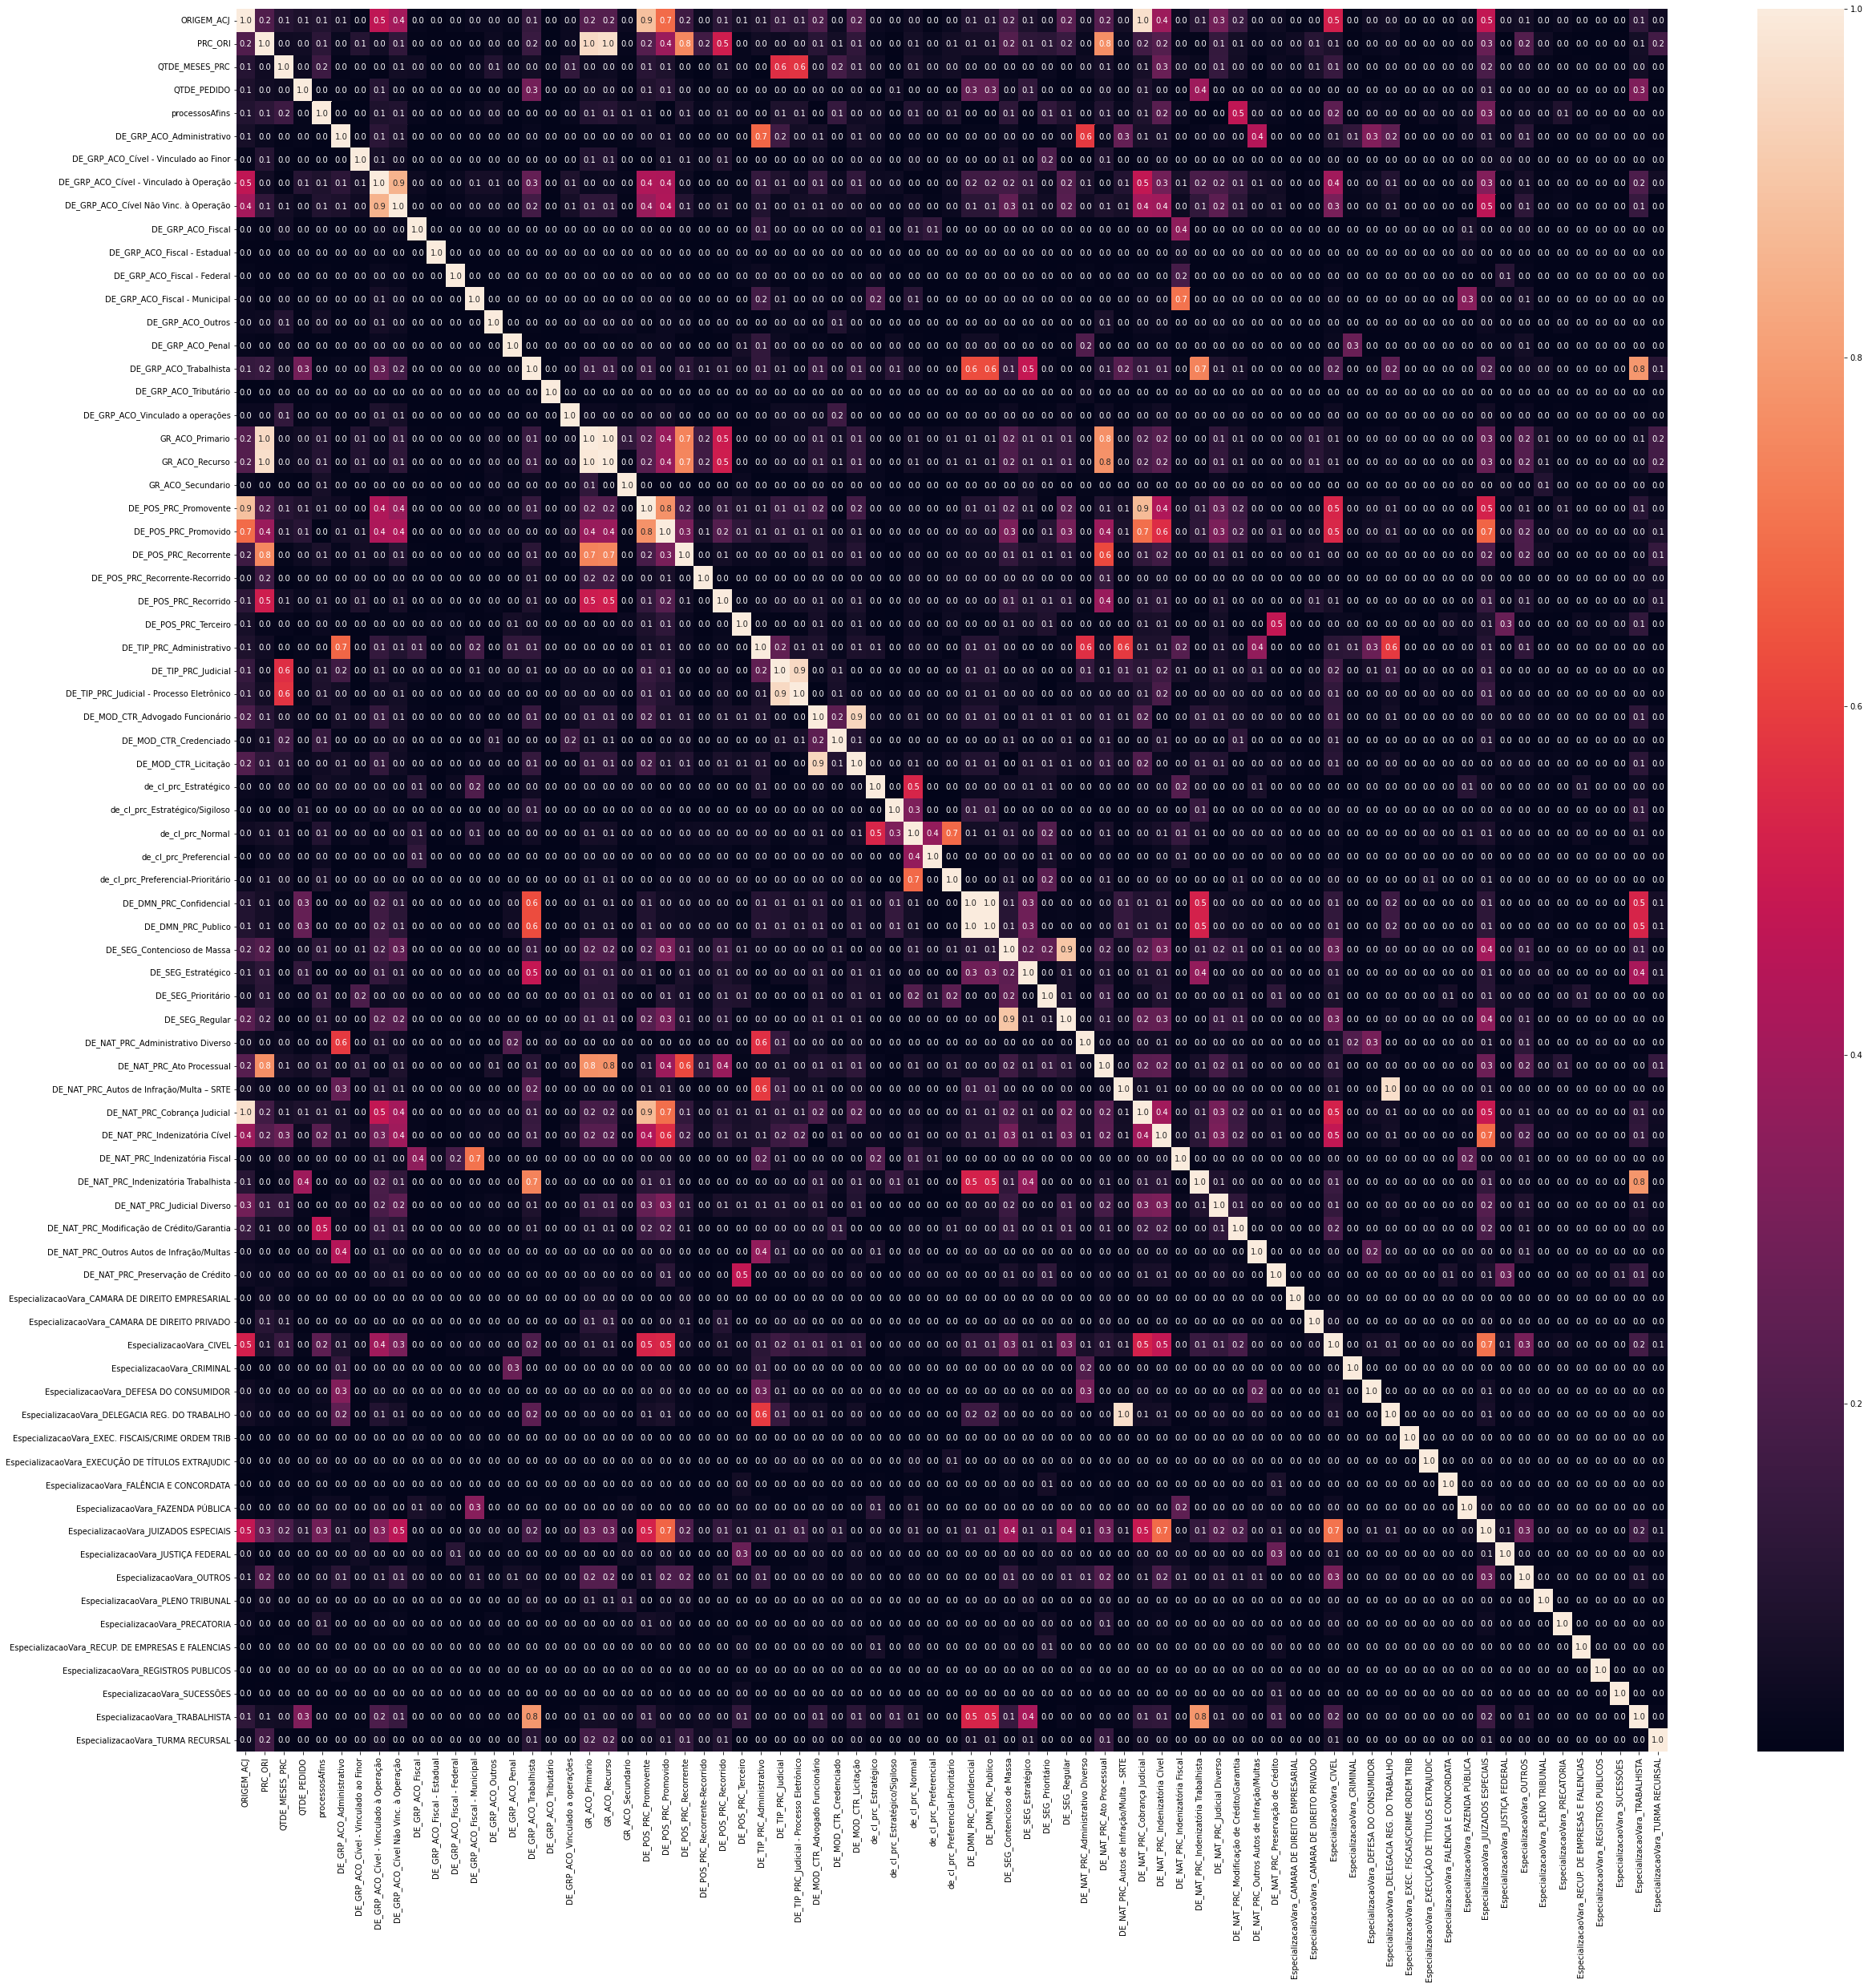

['DE_GRP_ACO_Cível Não Vinc. à Operação',
 'GR_ACO_Primario',
 'GR_ACO_Recurso',
 'DE_POS_PRC_Promovente',
 'DE_POS_PRC_Promovido',
 'DE_POS_PRC_Recorrente',
 'DE_TIP_PRC_Judicial - Processo Eletrônico',
 'DE_MOD_CTR_Licitação',
 'DE_DMN_PRC_Publico',
 'DE_SEG_Regular',
 'DE_NAT_PRC_Ato Processual',
 'DE_NAT_PRC_Cobrança Judicial',
 'DE_NAT_PRC_Indenizatória Fiscal',
 'DE_NAT_PRC_Indenizatória Trabalhista',
 'EspecializacaoVara_DELEGACIA REG. DO TRABALHO',
 'EspecializacaoVara_JUIZADOS ESPECIAIS',
 'EspecializacaoVara_TRABALHISTA']

In [ ]:
#Correlação
corr_matrix = provisao_final.corr().abs()
plt.figure(figsize = (40, 40))
sns.heatmap(corr_matrix, annot = True, fmt = ".1f")
plt.show()

#Selecionando parte superior do triângulo
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

#Encontrando as variáveis com alta correção
to_drop = [column for column in upper.columns if any(upper[column] >= 0.7)]
to_drop

In [ ]:
lista_correlacao = provisao_final.drop(to_drop, axis=1).columns.tolist()
lista_correlacao

['ORIGEM_ACJ',
 'PRC_ORI',
 'QTDE_MESES_PRC',
 'QTDE_PEDIDO',
 'processosAfins',
 'DE_GRP_ACO_Administrativo',
 'DE_GRP_ACO_Cível - Vinculado ao Finor',
 'DE_GRP_ACO_Cível - Vinculado à Operação',
 'DE_GRP_ACO_Fiscal',
 'DE_GRP_ACO_Fiscal - Estadual',
 'DE_GRP_ACO_Fiscal - Federal',
 'DE_GRP_ACO_Fiscal - Municipal',
 'DE_GRP_ACO_Outros',
 'DE_GRP_ACO_Penal',
 'DE_GRP_ACO_Trabalhista',
 'DE_GRP_ACO_Tributário',
 'DE_GRP_ACO_Vinculado a operações',
 'GR_ACO_Secundario',
 'DE_POS_PRC_Recorrente-Recorrido',
 'DE_POS_PRC_Recorrido',
 'DE_POS_PRC_Terceiro',
 'DE_TIP_PRC_Administrativo',
 'DE_TIP_PRC_Judicial',
 'DE_MOD_CTR_Advogado Funcionário',
 'DE_MOD_CTR_Credenciado',
 'de_cl_prc_Estratégico',
 'de_cl_prc_Estratégico/Sigiloso',
 'de_cl_prc_Normal',
 'de_cl_prc_Preferencial',
 'de_cl_prc_Preferencial-Prioritário',
 'DE_DMN_PRC_Confidencial',
 'DE_SEG_Contencioso de Massa',
 'DE_SEG_Estratégico',
 'DE_SEG_Prioritário',
 'DE_NAT_PRC_Administrativo Diverso',
 'DE_NAT_PRC_Autos de Infração/Mu

In [ ]:
#SelectKBest
selector = SelectKBest(chi2, k =40)
selector.fit(provisao_final, classificacao)
lista_selectkbest = provisao_final.columns[selector.get_support()]
lista_selectkbest

Index(['ORIGEM_ACJ', 'PRC_ORI', 'QTDE_MESES_PRC', 'QTDE_PEDIDO', 'processosAfins', 'DE_GRP_ACO_Cível - Vinculado à Operação', 'DE_GRP_ACO_Cível Não Vinc. à Operação', 'DE_GRP_ACO_Outros', 'DE_GRP_ACO_Vinculado a operações', 'GR_ACO_Primario', 'GR_ACO_Recurso', 'DE_POS_PRC_Promovente', 'DE_POS_PRC_Promovido', 'DE_POS_PRC_Recorrente', 'DE_POS_PRC_Recorrente-Recorrido', 'DE_POS_PRC_Recorrido', 'DE_POS_PRC_Terceiro', 'DE_TIP_PRC_Judicial', 'DE_TIP_PRC_Judicial - Processo Eletrônico', 'DE_MOD_CTR_Advogado Funcionário', 'DE_MOD_CTR_Credenciado', 'DE_MOD_CTR_Licitação', 'DE_SEG_Contencioso de Massa', 'DE_SEG_Estratégico', 'DE_SEG_Prioritário', 'DE_SEG_Regular', 'DE_NAT_PRC_Administrativo Diverso', 'DE_NAT_PRC_Ato Processual', 'DE_NAT_PRC_Autos de Infração/Multa – SRTE', 'DE_NAT_PRC_Cobrança Judicial', 'DE_NAT_PRC_Indenizatória Cível', 'DE_NAT_PRC_Judicial Diverso', 'DE_NAT_PRC_Modificação de Crédito/Garantia', 'DE_NAT_PRC_Preservação de Crédito', 'EspecializacaoVara_CIVEL',
       'Especializ

In [ ]:
#RFE - Eliminação Recursiva de Variáveis
rfe_selector = RFE(estimator=LogisticRegression(),n_features_to_select = 40, step = 1)
rfe_selector.fit(provisao_final, classificacao)
lista_RFE = provisao_final.columns[rfe_selector.get_support()]
lista_RFE

Index(['PRC_ORI', 'QTDE_PEDIDO', 'DE_GRP_ACO_Cível - Vinculado ao Finor', 'DE_GRP_ACO_Cível Não Vinc. à Operação', 'DE_GRP_ACO_Fiscal', 'DE_GRP_ACO_Fiscal - Municipal', 'DE_GRP_ACO_Outros', 'DE_GRP_ACO_Penal', 'DE_GRP_ACO_Vinculado a operações', 'GR_ACO_Secundario', 'DE_POS_PRC_Promovente', 'DE_POS_PRC_Promovido', 'DE_POS_PRC_Recorrente-Recorrido', 'DE_POS_PRC_Terceiro', 'DE_MOD_CTR_Licitação', 'de_cl_prc_Normal', 'DE_SEG_Estratégico', 'DE_NAT_PRC_Administrativo Diverso', 'DE_NAT_PRC_Ato Processual', 'DE_NAT_PRC_Autos de Infração/Multa – SRTE', 'DE_NAT_PRC_Cobrança Judicial', 'DE_NAT_PRC_Indenizatória Cível', 'DE_NAT_PRC_Indenizatória Fiscal', 'DE_NAT_PRC_Modificação de Crédito/Garantia', 'DE_NAT_PRC_Outros Autos de Infração/Multas', 'DE_NAT_PRC_Preservação de Crédito', 'EspecializacaoVara_CAMARA DE DIREITO PRIVADO', 'EspecializacaoVara_CRIMINAL', 'EspecializacaoVara_DELEGACIA REG. DO TRABALHO', 'EspecializacaoVara_EXEC. FISCAIS/CRIME ORDEM TRIB',
       'EspecializacaoVara_FALÊNCIA E 

In [ ]:
#RFECV - Eliminação com CV
rfecv_selector = RFECV(estimator = LogisticRegression(), cv = 5, scoring = "accuracy", 
                       step = 1)
rfecv_selector.fit(provisao_final, classificacao)
lista_RFECV = provisao_final.columns[rfecv_selector.get_support()]
lista_RFECV

Index(['PRC_ORI', 'DE_GRP_ACO_Outros', 'DE_GRP_ACO_Penal', 'DE_GRP_ACO_Vinculado a operações', 'GR_ACO_Secundario', 'DE_POS_PRC_Promovido', 'DE_NAT_PRC_Administrativo Diverso', 'DE_NAT_PRC_Ato Processual', 'DE_NAT_PRC_Modificação de Crédito/Garantia', 'DE_NAT_PRC_Preservação de Crédito', 'EspecializacaoVara_CRIMINAL', 'EspecializacaoVara_DELEGACIA REG. DO TRABALHO', 'EspecializacaoVara_JUIZADOS ESPECIAIS', 'EspecializacaoVara_PLENO TRIBUNAL', 'EspecializacaoVara_SUCESSÕES'], dtype='object')

In [ ]:
#SFS - Eliminação com SFS
sfs_selector = SequentialFeatureSelector(estimator=LogisticRegression(), 
                                         n_features_to_select = 15, cv =5, 
                                         direction ='backward')
sfs_selector.fit(provisao_final, classificacao)
lista_SFS = provisao_final.columns[sfs_selector.get_support()]
lista_SFS

Index(['QTDE_PEDIDO', 'DE_GRP_ACO_Cível Não Vinc. à Operação', 'DE_GRP_ACO_Fiscal', 'DE_GRP_ACO_Fiscal - Municipal', 'GR_ACO_Secundario', 'DE_POS_PRC_Promovido', 'DE_SEG_Contencioso de Massa', 'DE_SEG_Prioritário', 'DE_SEG_Regular', 'DE_NAT_PRC_Indenizatória Cível', 'DE_NAT_PRC_Indenizatória Trabalhista', 'DE_NAT_PRC_Outros Autos de Infração/Multas', 'EspecializacaoVara_DELEGACIA REG. DO TRABALHO', 'EspecializacaoVara_JUIZADOS ESPECIAIS', 'EspecializacaoVara_OUTROS'], dtype='object')

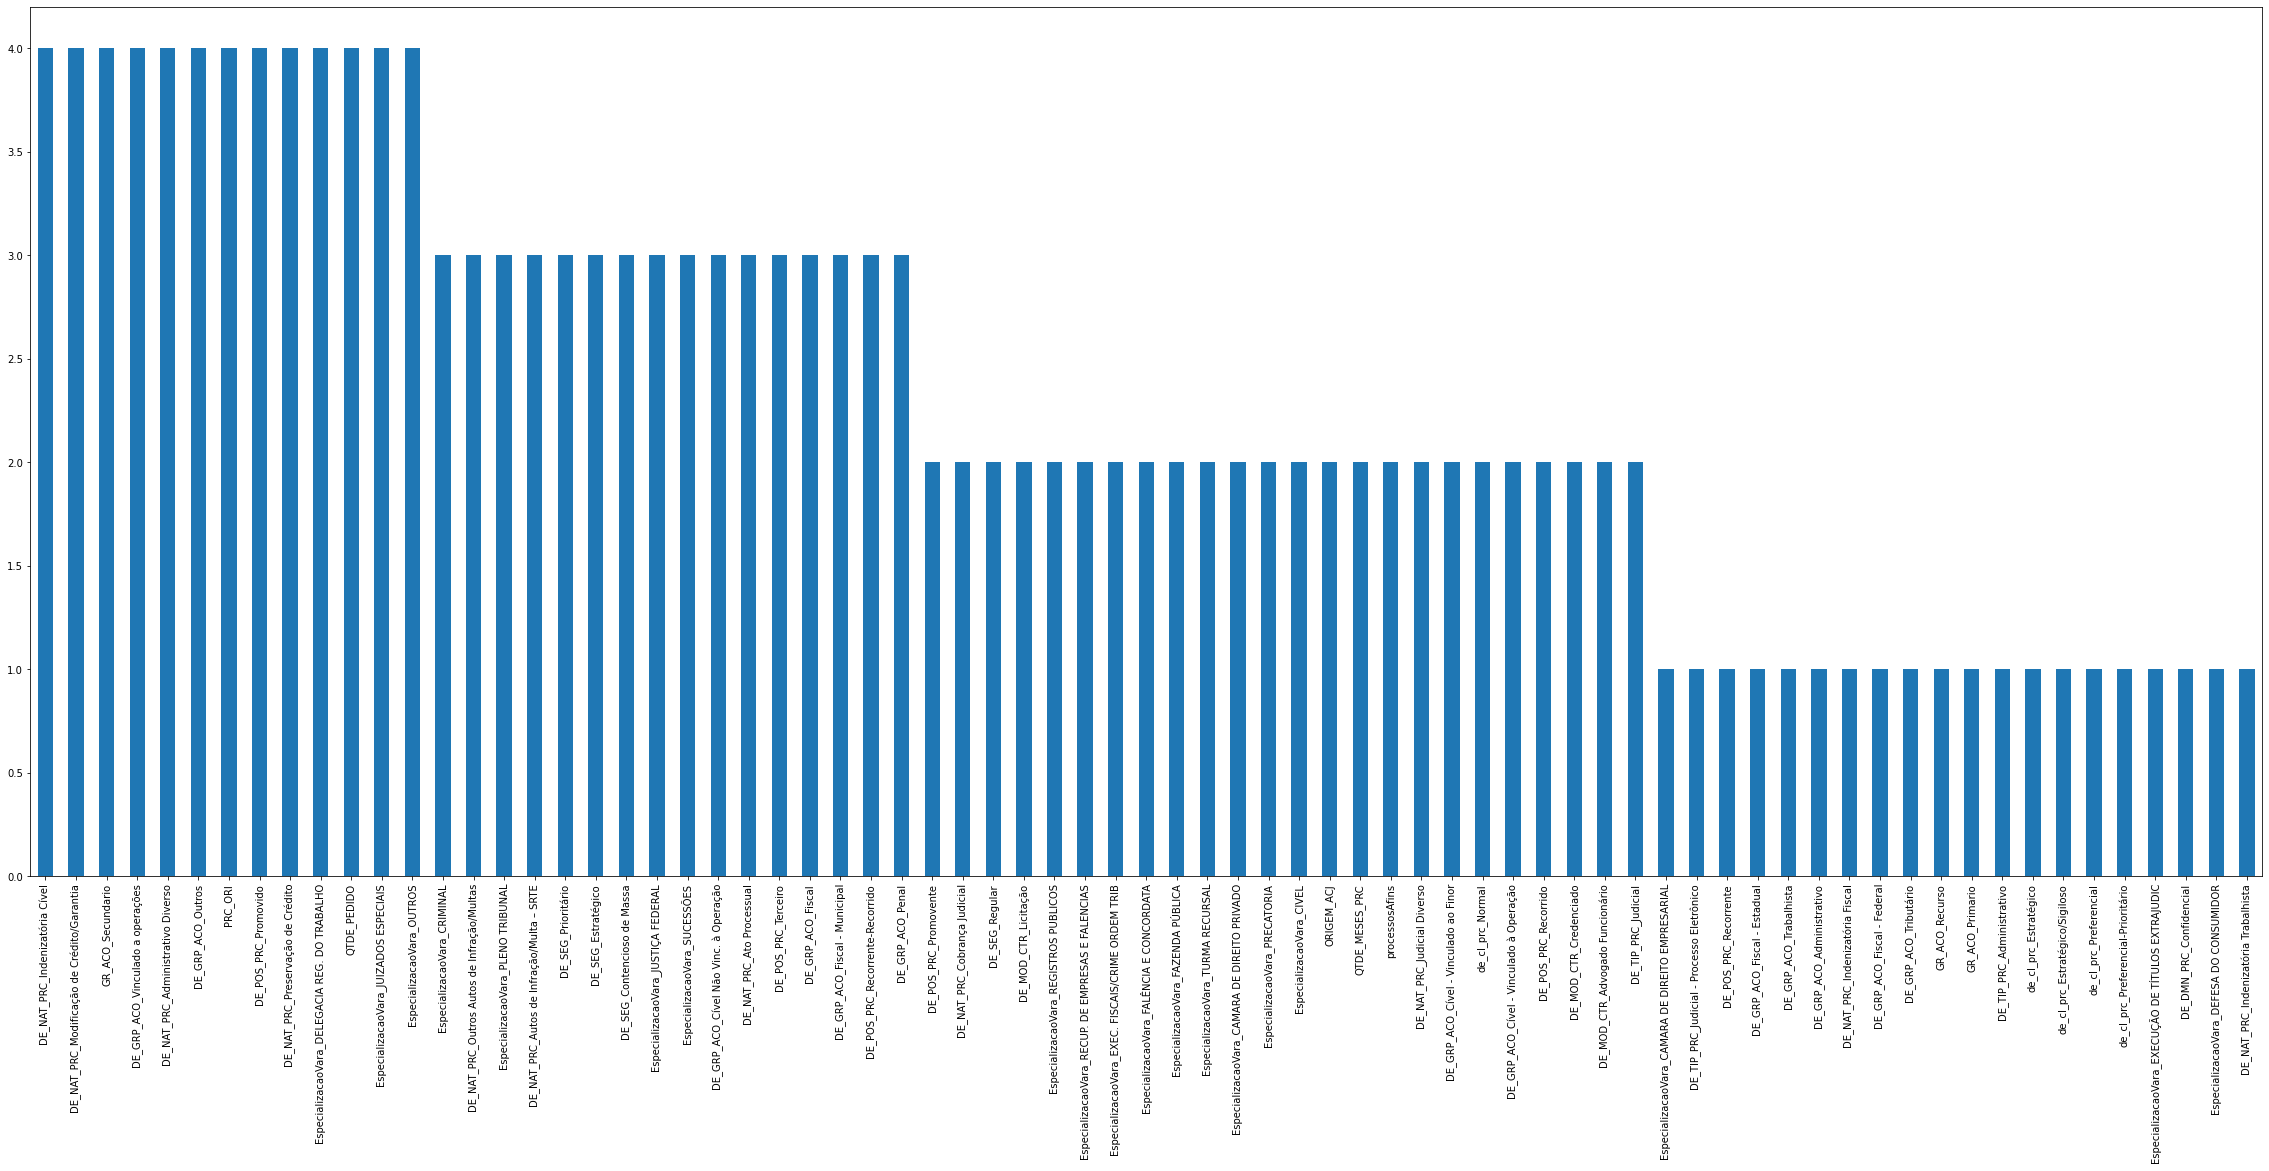

In [ ]:
lista_final = pd.concat([pd.Series(lista_correlacao), 
                         pd.Series(lista_selectkbest), 
                         pd.Series(lista_RFE), 
                         pd.Series(lista_RFECV), 
                         pd.Series(lista_SFS)])
lista_final.value_counts(sort=True)
plt.figure(figsize = (40, 16))
lista_final.value_counts().plot(kind='bar')
plt.show()

In [ ]:
lista_final = lista_final.value_counts().loc[lambda x : x > 1].index.tolist()
lista_final

['DE_NAT_PRC_Indenizatória Cível',
 'DE_NAT_PRC_Modificação de Crédito/Garantia',
 'GR_ACO_Secundario',
 'DE_GRP_ACO_Vinculado a operações',
 'DE_NAT_PRC_Administrativo Diverso',
 'DE_GRP_ACO_Outros',
 'PRC_ORI',
 'DE_POS_PRC_Promovido',
 'DE_NAT_PRC_Preservação de Crédito',
 'EspecializacaoVara_DELEGACIA REG. DO TRABALHO',
 'QTDE_PEDIDO',
 'EspecializacaoVara_JUIZADOS ESPECIAIS',
 'EspecializacaoVara_OUTROS',
 'EspecializacaoVara_CRIMINAL',
 'DE_NAT_PRC_Outros Autos de Infração/Multas',
 'EspecializacaoVara_PLENO TRIBUNAL',
 'DE_NAT_PRC_Autos de Infração/Multa – SRTE',
 'DE_SEG_Prioritário',
 'DE_SEG_Estratégico',
 'DE_SEG_Contencioso de Massa',
 'EspecializacaoVara_JUSTIÇA FEDERAL',
 'EspecializacaoVara_SUCESSÕES',
 'DE_GRP_ACO_Cível Não Vinc. à Operação',
 'DE_NAT_PRC_Ato Processual',
 'DE_POS_PRC_Terceiro',
 'DE_GRP_ACO_Fiscal',
 'DE_GRP_ACO_Fiscal - Municipal',
 'DE_POS_PRC_Recorrente-Recorrido',
 'DE_GRP_ACO_Penal',
 'DE_POS_PRC_Promovente',
 'DE_NAT_PRC_Cobrança Judicial',
 'DE_

In [ ]:
provisao_final = provisao_final[lista_final]
provisao_final

,DE_NAT_PRC_Indenizatória Cível,DE_NAT_PRC_Modificação de Crédito/Garantia,GR_ACO_Secundario,DE_GRP_ACO_Vinculado a operações,DE_NAT_PRC_Administrativo Diverso,DE_GRP_ACO_Outros,PRC_ORI,DE_POS_PRC_Promovido,DE_NAT_PRC_Preservação de Crédito,EspecializacaoVara_DELEGACIA REG. DO TRABALHO,QTDE_PEDIDO,EspecializacaoVara_JUIZADOS ESPECIAIS,EspecializacaoVara_OUTROS,EspecializacaoVara_CRIMINAL,DE_NAT_PRC_Outros Autos de Infração/Multas,EspecializacaoVara_PLENO TRIBUNAL,DE_NAT_PRC_Autos de Infração/Multa – SRTE,DE_SEG_Prioritário,DE_SEG_Estratégico,DE_SEG_Contencioso de Massa,EspecializacaoVara_JUSTIÇA FEDERAL,EspecializacaoVara_SUCESSÕES,DE_GRP_ACO_Cível Não Vinc. à Operação,DE_NAT_PRC_Ato Processual,DE_POS_PRC_Terceiro,DE_GRP_ACO_Fiscal,DE_GRP_ACO_Fiscal - Municipal,DE_POS_PRC_Recorrente-Recorrido,DE_GRP_ACO_Penal,DE_POS_PRC_Promovente,DE_NAT_PRC_Cobrança Judicial,DE_SEG_Regular,DE_MOD_CTR_Licitação,EspecializacaoVara_REGISTROS PUBLICOS,EspecializacaoVara_RECUP. DE EMPRESAS E FALENCIAS,EspecializacaoVara_EXEC. FISCAIS/CRIME ORDEM TRIB,EspecializacaoVara_FALÊNCIA E CONCORDATA,EspecializacaoVara_FAZENDA PÚBLICA,EspecializacaoVara_TURMA RECURSAL,EspecializacaoVara_CAMARA DE DIREITO PRIVADO,EspecializacaoVara_PRECATORIA,EspecializacaoVara_CIVEL,ORIGEM_ACJ,QTDE_MESES_PRC,processosAfins,DE_NAT_PRC_Judicial Diverso,DE_GRP_ACO_Cível - Vinculado ao Finor,de_cl_prc_Normal,DE_GRP_ACO_Cível - Vinculado à Operação,DE_POS_PRC_Recorrido,DE_MOD_CTR_Credenciado,DE_MOD_CTR_Advogado Funcionário,DE_TIP_PRC_Judicial
0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,1,0,0,1,0
3,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280805,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,71,0,0,0,1,1,0,0,1,0
280806,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,61,0,1,0,1,0,0,0,1,0
280807,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,141,0,0,0,1,0,0,0,1,1
280808,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,63,0,1,0,1,0,0,0,1,1


In [ ]:
from sklearn.metrics import confusion_matrix

def aplicar_modelo_ML(df, modelo_definido, x_train, y_train, x_test, y_test):   

    modelo = modelo_definido           
    print("Modelo:",modelo)
        
    modelo.fit(x_train,y_train)
    y_pred = modelo.predict(x_train)
    
    modelo.fit(x_train,y_train)
    y_pred = modelo.predict(x_test)
    
    confusao = confusion_matrix(y_test, y_pred)
    plt.figure(figsize = (10, 8))
    sns.set(font_scale= 2)
    sns.heatmap(confusao, annot = True, fmt = "d").set(xlabel = "Predição", ylabel= "Real")
    
    resultados = {'Modelo': [str(modelo)],                                 
                  'R2 (Acurácia) - Base Treinamento': modelo.score(x_train, y_train),    
                  'R2 (Acurácia) - Base Teste': modelo.score(x_test, y_test)}    
    
    return resultados

In [ ]:
from sklearn.model_selection import train_test_split
import random

SEED = 1234
random.seed(SEED)

#padrão 25% treino e 75% para teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(provisao_final,classificacao, random_state=SEED)

Modelo: DummyClassifier(strategy='most_frequent')


{'Modelo': ["DummyClassifier(strategy='most_frequent')"],
 'R2 (Acurácia) - Base Treinamento': 0.5003679839701435,
 'R2 (Acurácia) - Base Teste': 0.49889605857299546}

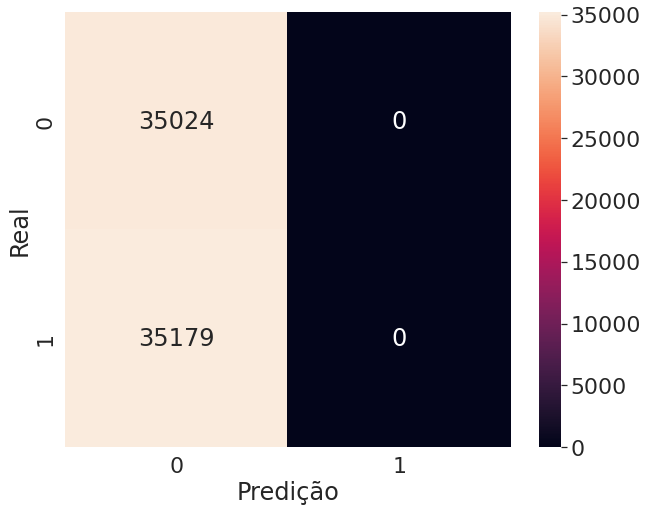

In [ ]:
from sklearn.dummy import DummyClassifier
classificador_bobo = DummyClassifier(strategy= "most_frequent")
aplicar_modelo_ML(provisao_final, classificador_bobo, X_treino, Y_treino, X_teste, Y_teste)

Modelo: SGDClassifier(max_iter=5)


{'Modelo': ['SGDClassifier(max_iter=5)'],
 'R2 (Acurácia) - Base Treinamento': 0.9216407811706163,
 'R2 (Acurácia) - Base Teste': 0.9221400794837827}

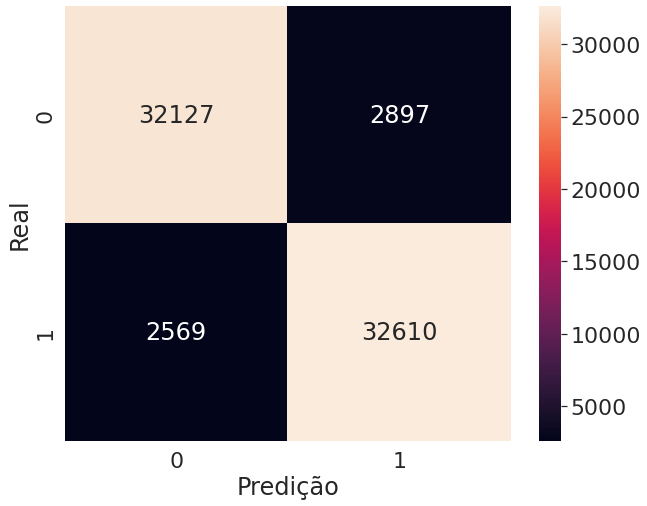

In [ ]:
#SGDClassifier hinge
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
aplicar_modelo_ML(provisao_final, sgd, X_treino, Y_treino, X_teste, Y_teste)

Modelo: SGDClassifier(loss='log')


{'Modelo': ["SGDClassifier(loss='log')"],
 'R2 (Acurácia) - Base Treinamento': 0.9042434486982864,
 'R2 (Acurácia) - Base Teste': 0.9067418771277581}

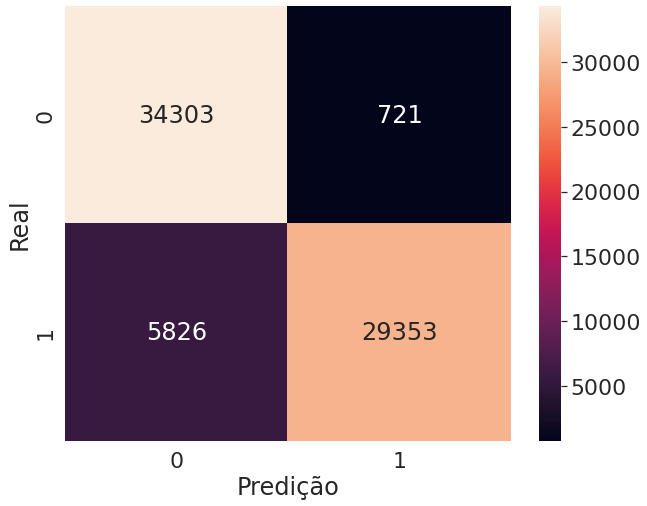

In [ ]:
#regreção logística loss='log' com treinamento SGD do modelo
sgd = SGDClassifier(loss="log", penalty="l2")
aplicar_modelo_ML(provisao_final, sgd, X_treino, Y_treino, X_teste, Y_teste)

Modelo: SGDClassifier(loss='log', max_iter=5)


{'Modelo': ["SGDClassifier(loss='log', max_iter=5)"],
 'R2 (Acurácia) - Base Treinamento': 0.6162853086554578,
 'R2 (Acurácia) - Base Teste': 0.6168539805991197}

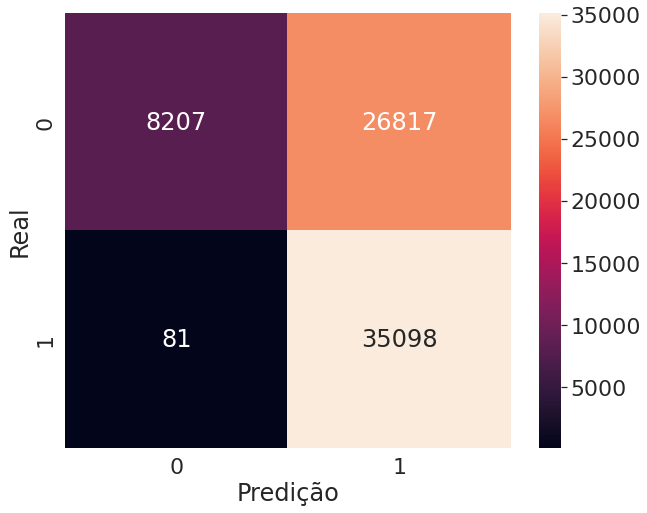

In [ ]:
#Verificando a influência sob o número de iterações
modelo = SGDClassifier(loss="log", penalty="l2", max_iter=5)
aplicar_modelo_ML(provisao_final, modelo, X_treino, Y_treino, X_teste, Y_teste)

Modelo: SGDClassifier(loss='log', max_iter=10)


{'Modelo': ["SGDClassifier(loss='log', max_iter=10)"],
 'R2 (Acurácia) - Base Treinamento': 0.8747762420052515,
 'R2 (Acurácia) - Base Teste': 0.8751477857071636}

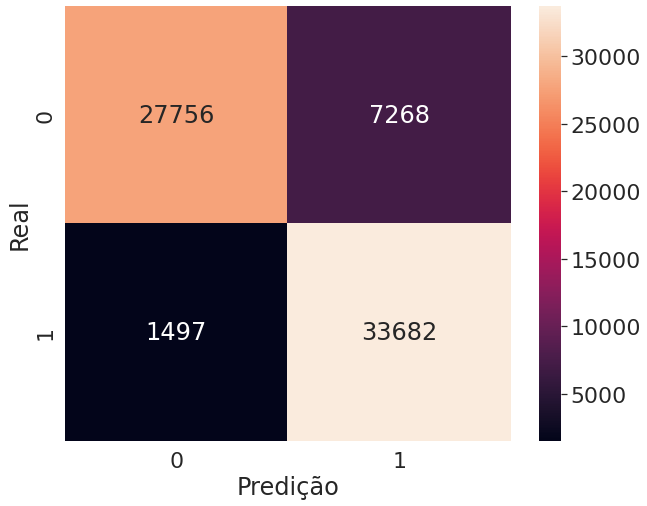

In [ ]:
#Verificando a influência sob o número de iterações
modelo = SGDClassifier(loss="log", penalty="l2", max_iter=10)
aplicar_modelo_ML(provisao_final, modelo, X_treino, Y_treino, X_teste, Y_teste)

Modelo: SGDClassifier(loss='log', max_iter=20)


{'Modelo': ["SGDClassifier(loss='log', max_iter=20)"],
 'R2 (Acurácia) - Base Treinamento': 0.8833514555546587,
 'R2 (Acurácia) - Base Teste': 0.8840078059342193}

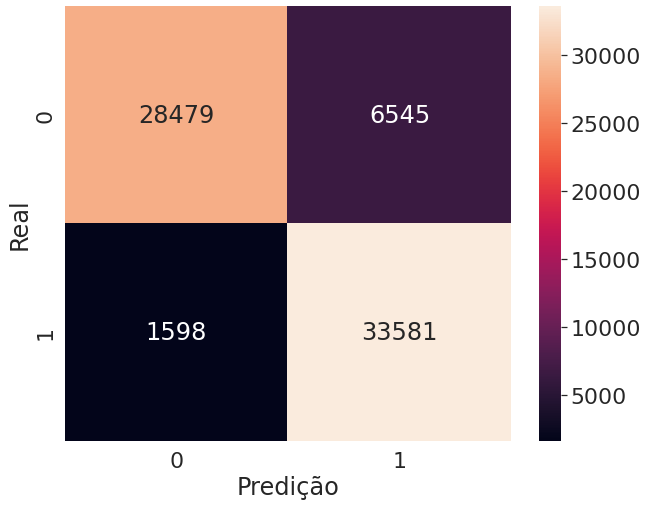

In [ ]:
#Verificando a influência sob o número de iterações
modelo = SGDClassifier(loss="log", penalty="l2", max_iter=20)
aplicar_modelo_ML(provisao_final, modelo, X_treino, Y_treino, X_teste, Y_teste)

Modelo: SGDClassifier(loss='log', max_iter=50)


{'Modelo': ["SGDClassifier(loss='log', max_iter=50)"],
 'R2 (Acurácia) - Base Treinamento': 0.9085500481940296,
 'R2 (Acurácia) - Base Teste': 0.9083942281668874}

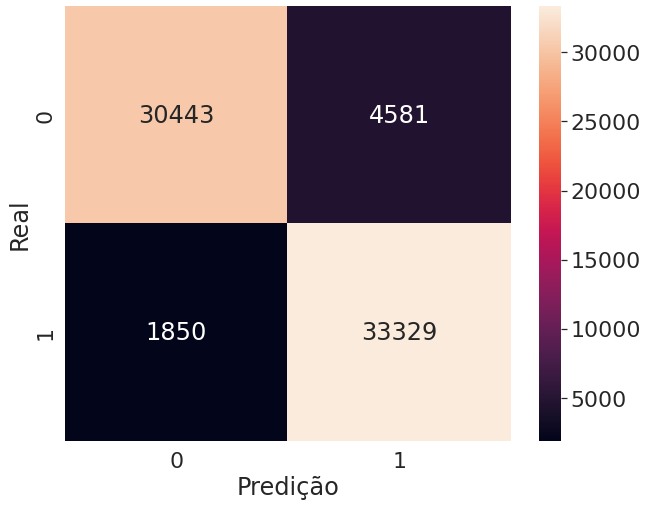

In [ ]:
#Verificando a influência sob o número de iterações
modelo = SGDClassifier(loss="log", penalty="l2", max_iter=50)
aplicar_modelo_ML(provisao_final, modelo, X_treino, Y_treino, X_teste, Y_teste)

Modelo: SGDClassifier(loss='log')


{'Modelo': ["SGDClassifier(loss='log')"],
 'R2 (Acurácia) - Base Treinamento': 0.9224099863727226,
 'R2 (Acurácia) - Base Teste': 0.9232653875190518}

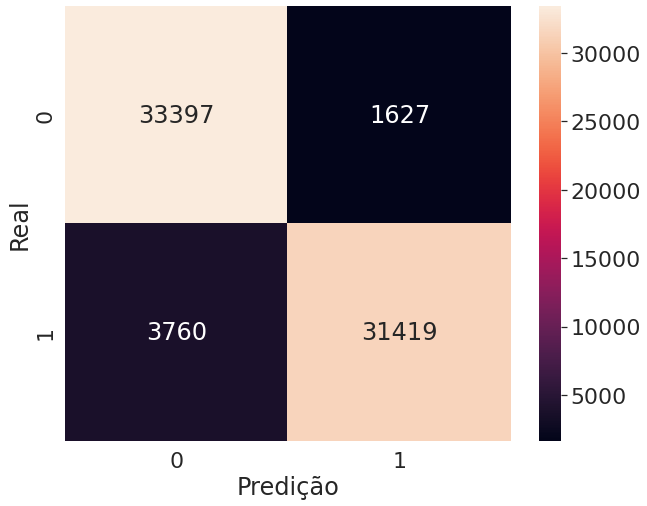

In [ ]:
#Verificando a influência sob o número de iterações
modelo = SGDClassifier(loss="log", penalty="l2", max_iter=1000)
aplicar_modelo_ML(provisao_final, modelo, X_treino, Y_treino, X_teste, Y_teste)

Modelo: DecisionTreeClassifier()


{'Modelo': ['DecisionTreeClassifier()'],
 'R2 (Acurácia) - Base Treinamento': 0.9728736461751034,
 'R2 (Acurácia) - Base Teste': 0.9658704043986724}

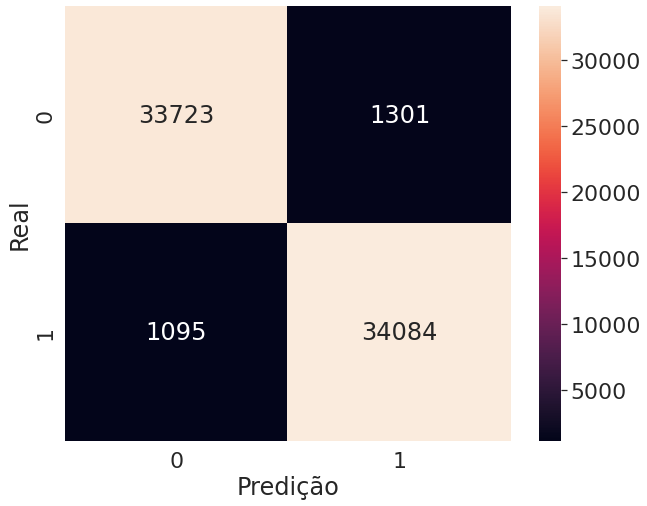

In [ ]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier()
aplicar_modelo_ML(provisao_final, decision, X_treino, Y_treino, X_teste, Y_teste)

Modelo: RandomForestClassifier()


{'Modelo': ['RandomForestClassifier()'],
 'R2 (Acurácia) - Base Treinamento': 0.9728736461751034,
 'R2 (Acurácia) - Base Teste': 0.9669957124339416}

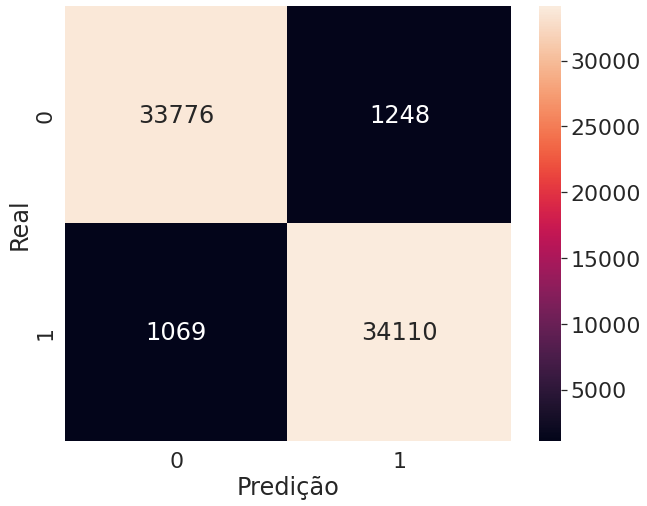

In [ ]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier()
aplicar_modelo_ML(provisao_final, random, X_treino, Y_treino, X_teste, Y_teste)